<a href="https://colab.research.google.com/github/sasireddyvari/LifeCycle_DataScience/blob/master/MultiCollinearity_in_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ordinary Least Square Regression**

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

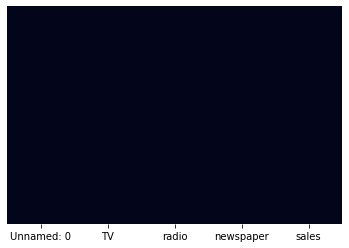

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [7]:
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


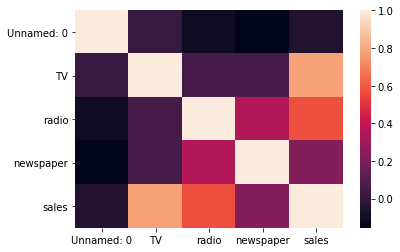

In [8]:
sns.heatmap(df.corr())

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


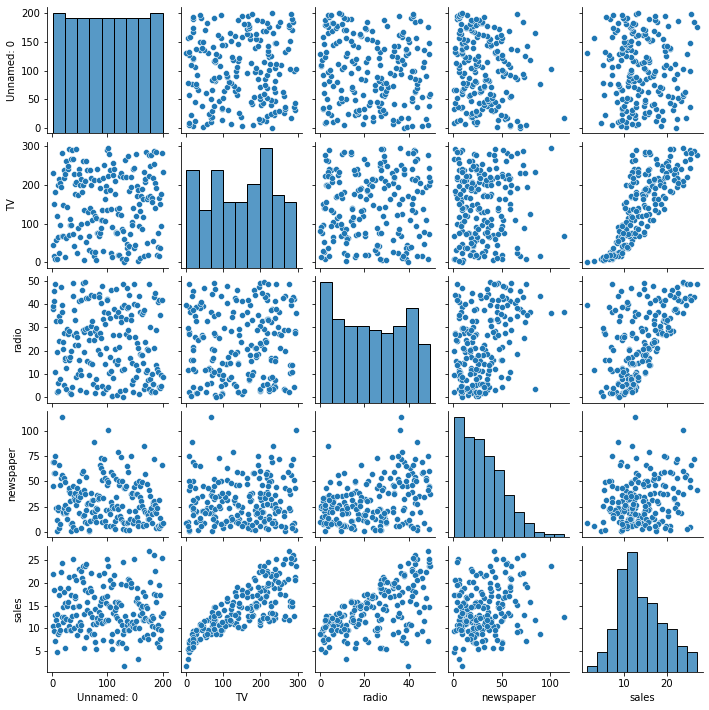

In [9]:
#sns.pairplot(df,dropna=True,size=2,kind='scatter',hue='Profit')
sns.pairplot(df,dropna=True,size=2,kind='scatter')

In [10]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [19]:
a=[1,2,3,4,5]

In [59]:
a[:-1] # start, stop, step

[1, 2, 3, 4]

In [38]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [44]:
# To select particular rows and particular columns
x=df.iloc[[0,1,2,3],[1,2,3]] 
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5


In [46]:
# To select a range of rows and columns
x=df.iloc[1:3,2:4] # 1 to 3 rows and 2 to 4 columns excludes outer one
x.head()

,radio,newspaper
1,39.3,45.1
2,45.9,69.3


In [50]:
x=df.iloc[1:8:2,0:4:2] # 1 to 8 rows with step 2 and 0 to 4 columns with step 2 excludes outer one
x.head()

,Unnamed: 0,radio
1,2,39.3
3,4,41.3
5,6,48.9
7,8,19.6


In [57]:
x=df.iloc[:,1:4]
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [58]:
x=df.iloc[:,1:-1]
x.head()


,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [61]:
 # Dont run
 +---+---+---+---+---+---+
 | P | y | t | h | o | n |
 +---+---+---+---+---+---+
 0   1   2   3   4   5   6
-6  -5  -4  -3  -2  -1

In [63]:
x=df.iloc[:,1:-1:2]
x.head()

,TV,newspaper
0,230.1,69.2
1,44.5,45.1
2,17.2,69.3
3,151.5,58.5
4,180.8,58.4


In [64]:
x=df.iloc[:,1:-1]
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [66]:
y=df['sales']
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [72]:
x=sm.add_constant(x)
x.head()

,const,TV,radio,newspaper
0,1.0,230.1,37.8,69.2
1,1.0,44.5,39.3,45.1
2,1.0,17.2,45.9,69.3
3,1.0,151.5,41.3,58.5
4,1.0,180.8,10.8,58.4


In [75]:
model=sm.OLS(y,x).fit()

In [76]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 13 Dec 2020   Prob (F-statistic):           1.58e-96
Time:                        06:20:27   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
x.iloc[:,1:].corr()

,TV,radio,newspaper
TV,1.000000,0.054809,0.056648
radio,0.054809,1.000000,0.354104
newspaper,0.056648,0.354104,1.000000


In [79]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Salary_Data.csv')
df.head()

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


In [82]:
x=df.iloc[:,:-1]
x.head()

,YearsExperience,Age
0,1.1,21.0
1,1.3,21.5
2,1.5,21.7
3,2.0,22.0
4,2.2,22.2


In [83]:
x.corr()

,YearsExperience,Age
YearsExperience,1.000000,0.987258
Age,0.987258,1.000000


In [85]:
y=df['Salary']
#y=df.iloc[:,-1]
y.head()

0    39343
1    46205
2    37731
3    43525
4    39891
Name: Salary, dtype: int64

In [87]:
x=sm.add_constant(x)
x.head()

,const,YearsExperience,Age
0,1.0,1.1,21.0
1,1.0,1.3,21.5
2,1.0,1.5,21.7
3,1.0,2.0,22.0
4,1.0,2.2,22.2


In [88]:
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     323.9
Date:                Sun, 13 Dec 2020   Prob (F-statistic):           1.35e-19
Time:                        06:28:56   Log-Likelihood:                -300.35
No. Observations:                  30   AIC:                             606.7
Df Residuals:                      27   BIC:                             610.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -6661.9872   2.28e+04     -0.292      0.773   -5.35e+04    4.02e+04
YearsExperience  6153.3533   2337.092      2.633      0.014    1358.037    1.09e+04
Age              1836.0136   1285.034      1.429      0.165    -800.659    4472.686
==============================================================================
Omnibus:                        2.695   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.975
Skew:                           0.456   Prob(JB):                        0.372
Kurtosis:                       2.135   Cond. No.                         626.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Remove the column with higher p value. Best p value is less than 0.05**

In [90]:
x.drop('Age',inplace=True, axis=1)

In [92]:
x.head()

,const,YearsExperience
0,1.0,1.1
1,1.0,1.3
2,1.0,1.5
3,1.0,2.0
4,1.0,2.2
